In [41]:
##complex data와 똑같이 40ms로 parsing했음 데이터 4배라고 생각하고 뻥튀기시켜봄 정확도는 10ms와 비슷하게 나옴

import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn import svm
from datetime import datetime
import glob
import pickle
import re
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from scipy import signal

#filename queue
filename_queue=glob.glob('./label/label[0-9]*.csv')
#filename_queue=glob.glob('./label/label[6].csv')


In [46]:
"""training_set2=list()
training_label2=list()
test_set2=list()
test_label2=list()
traininglabel_count2=np.zeros(16)
testlabel_count2=np.zeros(16)
"""
training_set=list()

test_set=list()
training_label=list()
test_label=list()
index=[1,2,3,11,14,15]
label_count=np.zeros(16)
traininglabel_count=np.zeros(16)
testlabel_count=np.zeros(16)
ldata=list()

for filename in filename_queue:
    with open(filename,newline='') as data:
        
        data_set=list()
        data_set2=list()
        data_label=list()
        reader=csv.reader(data)
        label=re.findall('\d+',filename)
        label=int(label[0])
        label_count[label]+=1
        if label in index:
            continue
        if label not in index:
            print('label : ', label)
            for row in reader:
                row[0:]=[float(i) for i in row[0:]]
                X_acc=list(row[i] for i in range(150))
                Y_acc=list(row[i+150] for i in range(150))
                Z_acc=list(row[i+300] for i in range(150))
                X_gyro=list(row[i+450] for i in range(150))
                Y_gyro=list(row[i+600] for i in range(150))
                Z_gyro=list(row[i+750] for i in range(150))

                window=np.array([X_acc[0:25],Y_acc[0:25],Z_acc[0:25],X_gyro[0:25],Y_gyro[0:25],Z_gyro[0:25],
                                  X_acc[25:50],Y_acc[25:50],Z_acc[25:50],X_gyro[25:50],Y_gyro[25:50],Z_gyro[25:50],
                                  X_acc[50:75],Y_acc[50:75],Z_acc[50:75],X_gyro[50:75],Y_gyro[50:75],Z_gyro[50:75],
                                  X_acc[75:100],Y_acc[75:100],Z_acc[75:100],X_gyro[75:100],Y_gyro[75:100],Z_gyro[75:100],
                                  X_acc[100:125],Y_acc[100:125],Z_acc[100:125],X_gyro[100:125],Y_gyro[100:125],Z_gyro[100:125],
                                  X_acc[125:150],Y_acc[125:150],Z_acc[125:150],X_gyro[125:150],Y_gyro[125:150],Z_gyro[125:150]])

                
                window2=np.array([[X_acc[0:25],X_acc[25:50],X_acc[50:75],X_acc[75:100],X_acc[100:125],X_acc[125:150]],
                    [Y_acc[0:25],Y_acc[25:50],Y_acc[50:75],Y_acc[75:100],Y_acc[100:125],Y_acc[125:150]],
                    [Z_acc[0:25],Z_acc[25:50],Z_acc[50:75],Z_acc[75:100],Z_acc[100:125],Z_acc[125:150]]])
               
            
            
                """
                window4=np.array([[X_gyro[0:25],X_gyro[25:50],X_gyro[50:75],X_gyro[75:100],X_gyro[100:125],X_gyro[125:150]],
                    [Y_gyro[0:25],Y_gyro[25:50],Y_gyro[50:75],Y_gyro[75:100],Y_gyro[100:125],Y_gyro[125:150]],
                    [Z_gyro[0:25],Z_gyro[25:50],Z_gyro[50:75],Z_gyro[75:100],Z_gyro[100:125],Z_gyro[125:150]]])
                """
                
                
                
                window_mean=window.mean(axis=-1)
                window_stddev=window.std(axis=-1)
                window_median=np.median(window,axis=-1)
                window_percent25=np.percentile(window,25,axis=-1)
                window_percent75=np.percentile(window,75,axis=-1)
                window_feature=np.array([[window_mean],[window_stddev],[window_median],[window_percent25],[window_percent75]])
                window_feature=window_feature.reshape(180)
                
                #Drop outliers1 
                xm=window_stddev[[0,6,12,18,24,30]].mean(axis=0)
                ym=window_stddev[[1,7,13,19,25,31]].mean(axis=0)
                zm=window_stddev[[2,8,14,20,26,32]].mean(axis=0)
                action=np.mean([xm,ym,zm])
                if(action<0.65):
                    label_count[label]-=1
                    continue
                
                window2=window2.reshape(-1)
                #window_RMS=np.roots(np.square(window2[0:6]).mean(axis=-1))
                #if (label_count[label]>=0):
                data_set.append(window_feature)
                data_set2.append(window2)
                data_label.append(label)
            
                #else:
                #    test_set.append(window_feature)
                #    test_label.append(label)
                #    testlabel_count[label]+=1
                
            from sklearn.manifold import TSNE
            from sklearn.decomposition import PCA
            from sklearn.decomposition import MiniBatchDictionaryLearning
            from sklearn.decomposition import IncrementalPCA
            from sklearn.decomposition import TruncatedSVD


            print(np.shape(data_set2))

            data_set2=np.array(data_set2)
            X_embedded2 = MiniBatchDictionaryLearning(n_components=3,n_iter=1000).fit_transform(data_set2)
            #fig = plt.figure()
            #ax2 = fig.add_subplot(111, projection='3d')
            #for x in X_embedded2:
            #    ax2.scatter(x[0],x[1],x[2]) 

            from scipy import stats
            z = np.abs(stats.zscore(X_embedded2))
            #X_embedded2 = X_embedded2[(abs(z) <1.8).all(axis=1)]
            data_set_arr=np.array(data_set)
            data_label_arr=np.array(data_label)
            data_set_arr=data_set_arr[(abs(z) <2).all(axis=1)]
            data_label_arr=data_label_arr[(abs(z) <2).all(axis=1)]

            #print(np.shape(data_set_arr))
            #print(np.shape(data_label_arr))

            for x in data_set_arr:
                training_set.append(x)
            for y in data_label_arr:
                training_label.append(y)
                
                

            #fig2 = plt.figure()
            #ax2 = fig2.add_subplot(111, projection='3d')
            #for x in X_embedded2:
            #    ax2.scatter(x[0],x[1],x[2]) 


label :  12
(248, 450)
data_set_arr :  248
data_set_arr[] :  [[-2.1239652  -2.8986654   9.02409984 ... 63.490002   17.08
   8.33      ]
 [-2.15430604 -2.86928136  8.9361396  ... 63.279999   18.129999
   7.84      ]
 [-2.16100592 -2.72887064  8.91709284 ... 56.630001   17.710001
   9.03      ]
 ...
 [ 0.45367912 -1.98642568  9.30415568 ... 55.860001   -2.8
  -5.6       ]
 [ 0.47607596 -2.031315    9.2534278  ... 58.170002   -3.15
  -6.16      ]
 [ 0.5132126  -1.9665174   9.30520856 ... 54.599998   -2.8
  -4.34      ]]
data_set_arr :  229
label :  8
(68, 450)
data_set_arr :  68
data_set_arr[] :  [[ -0.99445704  -5.50167352   4.88729244 ... 116.900002    28.
    5.53      ]
 [ -1.08605444  -5.62648324   4.78956956 ... 120.610001    26.880001
    5.95      ]
 [ -1.12826372  -5.67165984   4.70285344 ... 125.93        24.780001
    4.97      ]
 ...
 [ -0.70348984  -5.811209     6.13940872 ...  41.439999     8.19
   24.639999  ]
 [ -0.60279984  -5.87983512   6.36213252 ...  42.98         7.35

data_set_arr :  136
data_set_arr[] :  [[-1.32284804 -3.97265972  7.42856568 ...  0.42        0.77
   0.63      ]
 [-1.39051708 -4.14628308  7.45967244 ...  0.14        1.05
   0.42      ]
 [-1.4467006  -4.15776856  7.3433812  ...  0.49        1.4
   0.35      ]
 ...
 [-1.20703544 -6.15060696  6.36978956 ...  8.89        2.52
  -6.09      ]
 [-1.13860084 -6.29398492  6.34165    ...  7.42        0.91
  -5.6       ]
 [-1.19172144 -6.3944836   6.33322724 ...  7.63        1.75
  -4.97      ]]
data_set_arr :  120
label :  13
(36, 450)
data_set_arr :  36
data_set_arr[] :  [[-5.1785468  -2.42048364  7.837834   ... 97.019997    7.98
   5.32      ]
 [-5.23128456 -2.47130724  7.80529152 ... 89.739998    7.42
   6.3       ]
 [-5.21549184 -2.50289256  7.76700648 ... 91.699997    8.12
   5.95      ]
 ...
 [-5.23903724 -3.4564802   6.98369224 ... 66.779999    3.99
  12.11      ]
 [-5.29790088 -3.44901452  6.91238604 ... 66.5         3.5
  11.55      ]
 [-5.416489   -3.42613916  6.8614666  ... 56.84  

In [47]:
X=training_set
y=training_label

print(np.shape(X))

(1003, 180)


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#X=preprocessing.minmax_scale(training_set)
#X=preprocessing.robust_scale(training_set)
#X=preprocessing.quantile_transform(training_set)

X=training_set
y=training_label
RF=RandomForestClassifier()
param_grid={
 'n_estimators':[50,80,100,120]
   # 'max_features':['auto','sqrt','log2'],
    #'max_depth':[10,12,None]
    #'criterion':['gini','entropy']
}
grid=GridSearchCV(estimator=RF,param_grid=param_grid,cv=10,scoring='accuracy')

In [71]:
grid.fit(X,y)

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [72]:
grid.cv_results_

{'mean_fit_time': array([0.24117293, 0.36710589, 0.4635046 , 0.54780335]),
 'std_fit_time': array([0.03415731, 0.01080353, 0.01475225, 0.01220479]),
 'mean_score_time': array([0.00364089, 0.00504973, 0.00693421, 0.00730908]),
 'std_score_time': array([0.00107072, 0.0003173 , 0.00115627, 0.00039588]),
 'param_n_estimators': masked_array(data=[50, 80, 100, 120],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 50},
  {'n_estimators': 80},
  {'n_estimators': 100},
  {'n_estimators': 120}],
 'split0_test_score': array([0.75961538, 0.91346154, 0.81730769, 0.83653846]),
 'split1_test_score': array([1., 1., 1., 1.]),
 'split2_test_score': array([0.9223301 , 0.87378641, 0.96116505, 0.90291262]),
 'split3_test_score': array([0.9223301 , 0.93203883, 0.9223301 , 0.89320388]),
 'split4_test_score': array([0.96078431, 0.92156863, 0.96078431, 0.95098039]),
 'split5_test_score': array([0.94, 0.95, 0.95, 0.95]),
 'split6_

In [73]:
grid.best_params_

{'n_estimators': 80}

In [74]:
RF=RandomForestClassifier(n_estimators=80)
RF.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
X=preprocessing.quantile_transform(training_set)
ETC=ExtraTreesClassifier()

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2553: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing.data` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)


In [55]:
param_grid={
 'n_estimators':[100,200,300],
   # 'max_features':['auto','sqrt','log2'],
    'max_depth':[10,14,None]
    #'criterion':['gini','entropy']
}

grid=GridSearchCV(estimator=ETC,param_grid=param_grid,cv=10,scoring='accuracy')

In [56]:
grid.fit(X,y)


/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None,
                                            criterion='gini', max_depth=None,
                                            max_features='auto',
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators='warn', n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 14,

In [57]:
grid.cv_results_

{'mean_fit_time': array([0.12472796, 0.27743201, 0.37081385, 0.12711234, 0.24821479,
        0.36868317, 0.139818  , 0.29409237, 0.37685678]),
 'std_fit_time': array([0.0068457 , 0.05636326, 0.01407262, 0.00190537, 0.00460285,
        0.00297357, 0.03305678, 0.07153888, 0.02325123]),
 'mean_score_time': array([0.00634789, 0.01380076, 0.01798542, 0.00626302, 0.01183152,
        0.01728599, 0.00692947, 0.01367409, 0.0204375 ]),
 'std_score_time': array([0.00063893, 0.00628376, 0.00138215, 0.00028359, 0.00037257,
        0.0001674 , 0.00263745, 0.00572703, 0.00762196]),
 'param_max_depth': masked_array(data=[10, 10, 10, 14, 14, 14, None, None, None],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 300, 100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False, False, False,
                    Fals

In [58]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [68]:
ETC=ExtraTreesClassifier(max_depth=10,n_estimators=200).fit(X,y)

In [14]:
class_names=['face','jotting','clinking','drinking1','tissue','drink2','spoon','chopstick','fork','stir']

X=training_set
y=training_label

#print((test_pred_proba))
#for row in test_pred_proba:
#    print(np.max([row]))
test_pred3=ETC.predict(preprocessing.quantile_transform(X))
print(accuracy_score(test_pred3,training_label))
print(confusion_matrix(test_pred3, training_label))

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2553: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing.data` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)


1.0
[[116   0   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0   0   0]
 [  0   0 120   0   0   0   0   0   0   0]
 [  0   0   0 200   0   0   0   0   0   0]
 [  0   0   0   0  57   0   0   0   0   0]
 [  0   0   0   0   0  56   0   0   0   0]
 [  0   0   0   0   0   0  68   0   0   0]
 [  0   0   0   0   0   0   0 128   0   0]
 [  0   0   0   0   0   0   0   0 224   0]
 [  0   0   0   0   0   0   0   0   0  28]]


In [60]:
#SVM
#prepare the data
#prepare the model
#X=preprocessing.minmax_scale(training_set)
#X=preprocessing.robust_scale(training_set)
X=preprocessing.quantile_transform(training_set)
y=training_label
clf = sklearn.svm.SVC(gamma='scale',tol=0.1,probability=True)
scores=cross_val_score(clf,X,y,cv=10,scoring='accuracy')
print(scores.mean())

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2553: FutureWarning: The default value of `copy` will change from False to True in 0.23 in order to make it more consistent with the default `copy` values of other functions in :mod:`sklearn.preprocessing.data` and prevent unexpected side effects by modifying the value of `X` inplace. To avoid inplace modifications of `X`, it is recommended to explicitly set `copy=True`
  FutureWarning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.8990981564333177


In [61]:
param_grid={
 #'kernel':['linear','poly','rbf','sigmoid'], rbf to be best acc
    'C':[10,20,50,100]}

grid=GridSearchCV(estimator=clf,param_grid=param_grid,cv=10,scoring='accuracy')

In [62]:
grid.fit(X,y)
grid.cv_results_

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([0.46798856, 0.48565786, 0.4766386 , 0.47274423]),
 'std_fit_time': array([0.00761205, 0.03129514, 0.0179232 , 0.02274346]),
 'mean_score_time': array([0.01283371, 0.01330097, 0.01275473, 0.0133321 ]),
 'std_score_time': array([0.00064886, 0.00156187, 0.00057438, 0.00153822]),
 'param_C': masked_array(data=[10, 20, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 10}, {'C': 20}, {'C': 50}, {'C': 100}],
 'split0_test_score': array([0.91346154, 0.91346154, 0.91346154, 0.91346154]),
 'split1_test_score': array([0.88349515, 0.88349515, 0.88349515, 0.88349515]),
 'split2_test_score': array([0.9223301, 0.9223301, 0.9223301, 0.9223301]),
 'split3_test_score': array([0.90291262, 0.90291262, 0.90291262, 0.90291262]),
 'split4_test_score': array([1., 1., 1., 1.]),
 'split5_test_score': array([1., 1., 1., 1.]),
 'split6_test_score': array([0.84848485, 0.84848485, 0.84848485, 0.84848485]),
 'spl

In [63]:
grid.best_params_

{'C': 10}

In [65]:
SVC=sklearn.svm.SVC(10,probability=True).fit(X,y)

/home/parkj0/anaconda3/envs/venv/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [66]:
#save the model

from joblib import dump, load
filename='./svm.sav'
pickle.dump(SVC,open(filename,'wb'))

In [75]:
filename='./rf.sav'
pickle.dump(RF,open(filename,'wb'))
dump(RF,'rf.joblib')

['rf.joblib']

In [69]:
filename='./ETC.sav'
pickle.dump(ETC,open(filename,'wb'))
dump(ETC,'ETC.joblib')

['ETC.joblib']

NameError: name 'FactorAnalysis' is not defined

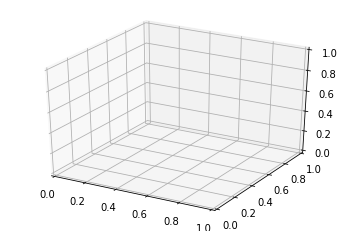

In [84]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import TruncatedSVD



fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

labl=9
X=training_set
y=labl
k=0
#X_embedded1 = TSNE(n_components=3).fit_transform(X)
X_embedded1 = PCA(n_components=3).fit_transform(X)
X_embedded2 = MiniBatchDictionaryLearning(n_components=3,n_iter=1000).fit_transform(X)
X_embedded3 = IncrementalPCA(n_components=3).fit_transform(X)
X_embedded4 = TruncatedSVD(n_components=3,n_iter=500).fit_transform(X)
X_embedded5 = FactorAnalysis(n_components=3).fit_transform(X)


   
for x in X_embedded1:
    ax1.scatter(x[0],x[1],x[2]) 
    
#for x in X_embedded3:
#    ax.scatter(x[0],x[1],x[2]) 
    